In [1]:
# !pip install pillow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# _URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
# PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
# PATH = '../data/car-damage-dataset/data3a'
PATH = '../data/cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


In [6]:
# len(list(os.walk(PATH)))
train_directories = os.listdir(train_dir)
classes = []
train_dirs = []
validation_dirs = []
total_train = 0
total_val = 0
for name in train_directories:
    full_path = os.path.join(train_dir, name)
    inode = os.stat(full_path)
    if os.path.isdir(full_path):
        classes.append(name)
        train_dirs.append(os.path.join(train_dir, name))
        validation_dirs.append(os.path.join(validation_dir, name))
        total_train = total_train + len(os.listdir(os.path.join(train_dir, name)))
        total_val = total_val + len(os.listdir(os.path.join(validation_dir, name)))

print(train_dirs)
print(validation_dirs)   
print(total_train)
print(total_val)


['../data/cats_and_dogs/train/dogs', '../data/cats_and_dogs/train/cats']
['../data/cats_and_dogs/validation/dogs', '../data/cats_and_dogs/validation/cats']
2000
1000


In [7]:
# train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [8]:
# num_cats_tr = len(os.listdir(train_cats_dir))
# num_dogs_tr = len(os.listdir(train_dogs_dir))

# num_cats_val = len(os.listdir(validation_cats_dir))
# num_dogs_val = len(os.listdir(validation_dogs_dir))

# total_train = num_cats_tr + num_dogs_tr
# total_val = num_cats_val + num_dogs_val

In [9]:
# print('total training cat images:', num_cats_tr)
# print('total training dog images:', num_dogs_tr)

# print('total validation cat images:', num_cats_val)
# print('total validation dog images:', num_dogs_val)
# print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training images: 2000
Total validation images: 1000


In [10]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)

In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

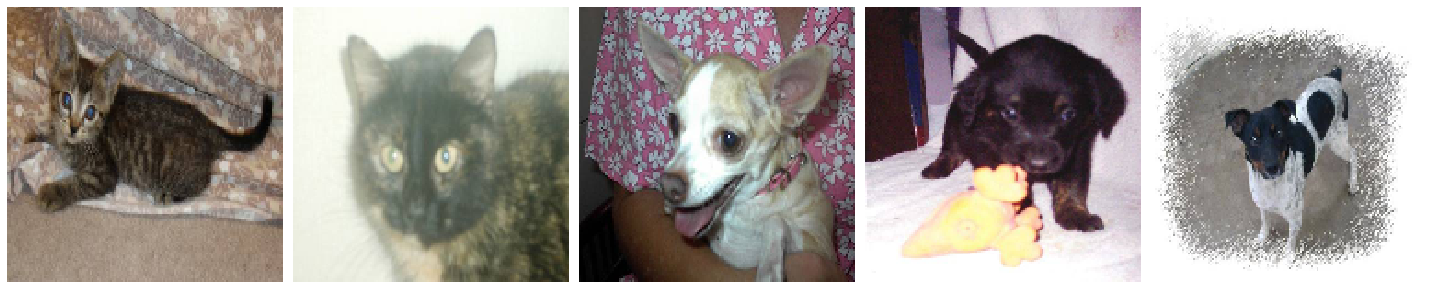

In [16]:
plotImages(sample_training_images[:5])

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 18s 1s/step - loss: 0.9422 - accuracy: 0.5118 - val_loss: 0.6838 - val_accuracy: 0.5647
Epoch 2/15
15/15 [==============================] - 15s 1s/step - loss: 0.6879 - accuracy: 0.5203 - val_loss: 0.6874 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.6618 - accuracy: 0.5604 - val_loss: 0.6443 - val_accuracy: 0.5603
Epoch 4/15
15/15 [==============================] - 16s 1s/step - loss: 0.6148 - accuracy: 0.6197 - val_loss: 0.6023 - val_accuracy: 0.6328
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.5504 - accuracy: 0.6911 - val_loss: 0.5608 - val_accuracy: 0.6741
Epoch 6/15
15/15 [==============================] - 30s 2s/step - loss: 0.4791 - accuracy: 0.7393 - val_loss: 0.6447 - val_accuracy: 

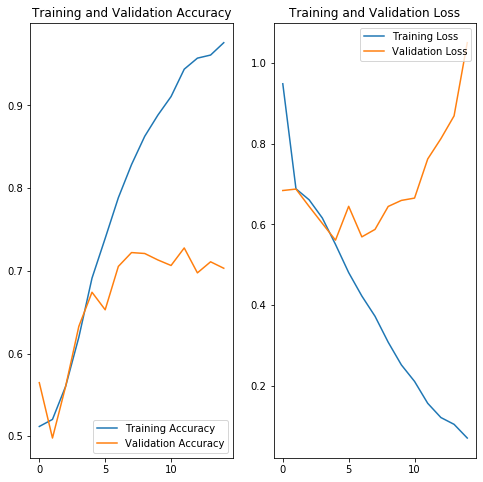

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [23]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

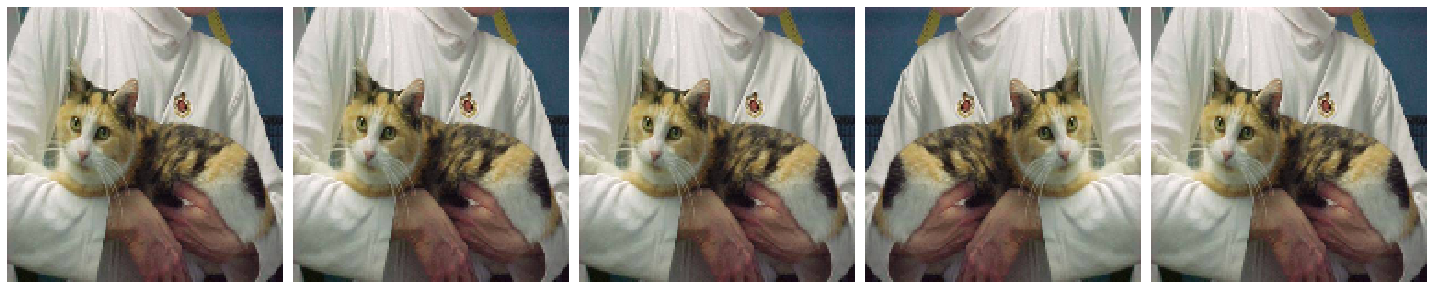

In [25]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [26]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


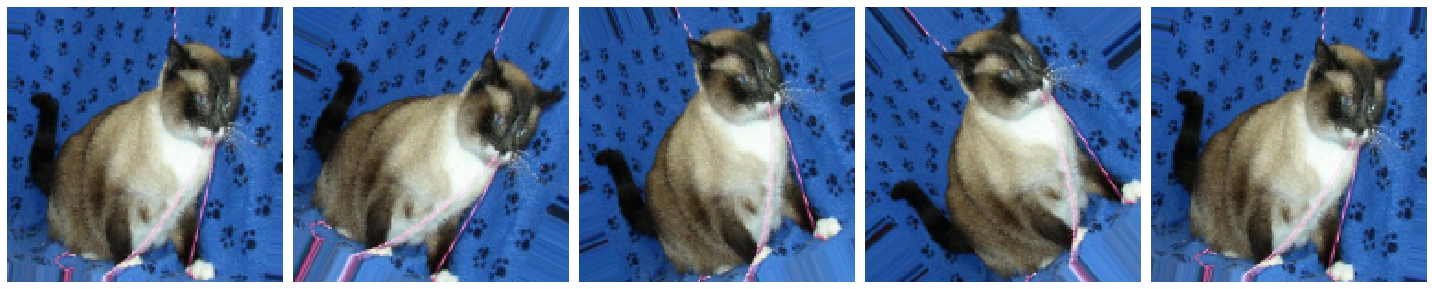

In [28]:
plotImages(augmented_images)

In [29]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [30]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


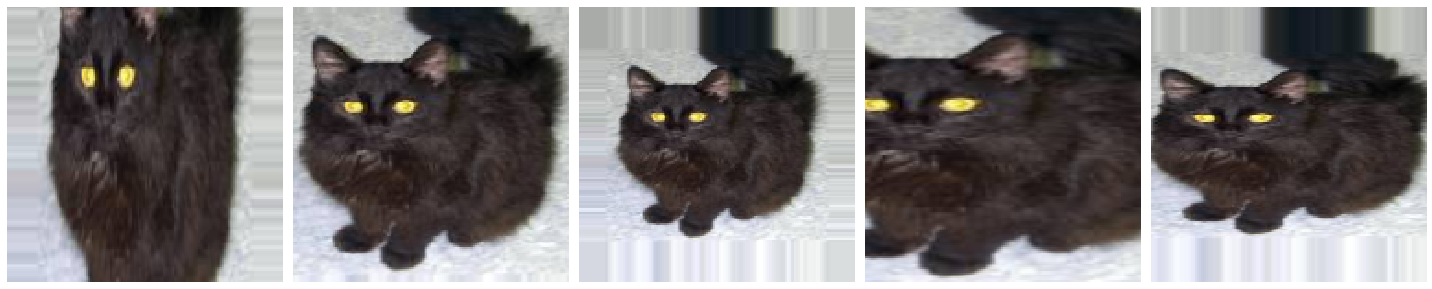

In [31]:
plotImages(augmented_images)

In [32]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [33]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


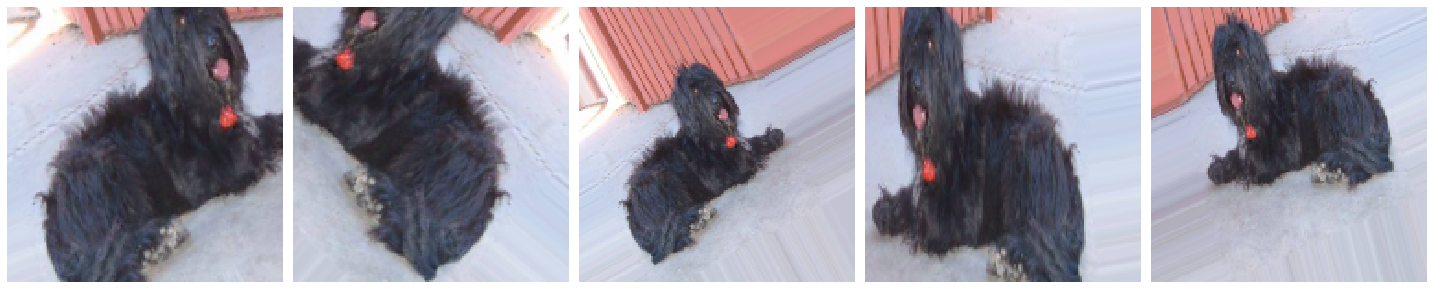

In [34]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [35]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [36]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [37]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [38]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [39]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 26s 2s/step - loss: 1.3908 - accuracy: 0.4995 - val_loss: 0.6921 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 28s 2s/step - loss: 0.6920 - accuracy: 0.5005 - val_loss: 0.6860 - val_accuracy: 0.5067
Epoch 3/15
15/15 [==============================] - 26s 2s/step - loss: 0.6865 - accuracy: 0.5144 - val_loss: 0.6817 - val_accuracy: 0.5123
Epoch 4/15
15/15 [==============================] - 28s 2s/step - loss: 0.6741 - accuracy: 0.5497 - val_loss: 0.6568 - val_accuracy: 0.5469
Epoch 5/15
15/15 [==============================] - 27s 2s/step - loss: 0.6639 - accuracy: 0.5620 - val_loss: 0.6500 - val_accuracy: 0.5759
Epoch 6/15
15/15 [==============================] - 29s 2s/step - loss: 0.6547 - accuracy: 0.5694 - val_loss: 0.6388 - val_accuracy: 0.5993
Epoch 7/15
15/15 [==============================] - 29s 2s/step - los

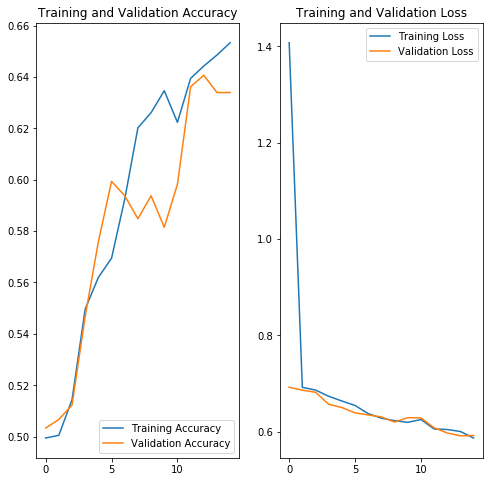

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()